# Simple Linear Regression


**Step 1: Import necessary libraries**

**Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)**

**Step 3: Creating a Linear Regression Model**

**Step 4: Training the model using data set**

**Step 5: Get the values of slope and intercept from the trained model**

**Step 6: Display the equation of the line**

**Step 7: Predict values using the model**

**Step 8: Plot the regression line**

**Step 9: Prediction Features**


In [70]:
#Step 1 : Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score,root_mean_squared_error 
import statsmodels.api as sm # For OLS (Ordinary Least Squares) Regression

In [28]:
#Step 2 : Define Dataset
np.random.seed(42)  # Ensuring reproducibility of random noise
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [29]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
y = true_salaries + noise  # Final dependent variable with noise

In [30]:
#Step 3: Create linear regression model
model=LinearRegression()

In [31]:
#Step 4:Train the model
model.fit(x,y) #learns best  fit line by minimizing the error

LinearRegression()

In [32]:
#Step 5: get slope m and intercept c
m=model.coef_[0]
print("Coefficient or slope",m)
c=model.intercept_
print("Intercept",c)

Coefficient or slope 4.965498141580591
Intercept 27.430065779800536


In [33]:
#Step 6: Get the equation of line
print(f'Equation of line : y = {m:.2f}x + {c:.2f}')

Equation of line : y = 4.97x + 27.43


In [34]:
# Step 7:Predict values using model
y_pred=model.predict(x)

# Model Evaluation Metrics

In [35]:
#Mean Squared error : measures average squared difference between actual and predicted values
mse=mean_squared_error(y,y_pred)
print(f"MSE :{mse:.2f}")

MSE :11.75


In [36]:
#Mean Absolute error : measures average absolute difference between actual and predicted values
mae=mean_absolute_error(y,y_pred)
print(f"MAE :{mae:.2f}")

MAE :2.87


In [38]:
#Root Mean Squared error : measures standard deviation of residuals(errors)
rmse=np.sqrt(mse)
print(f"RMSE :{rmse:.2f}")

RMSE :3.43


In [42]:
#R2 Score:Represents how well the model fits the data(0 to 1  where 1 is the best)
r2=r2_score(y,y_pred)
print(f"R2 Score  :{r2:.2f}")

R2 Score  :0.95


In [43]:
#Adjusted R-squared (R2_adj) - Adjusted for the number of predictors, better for multiple regression
n=len(y) #Number of observations
p=1 #Number of independent variables (Experience)
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f'Adjusted R-squared: {adj_r2:.2f}')

Adjusted R-squared: 0.94


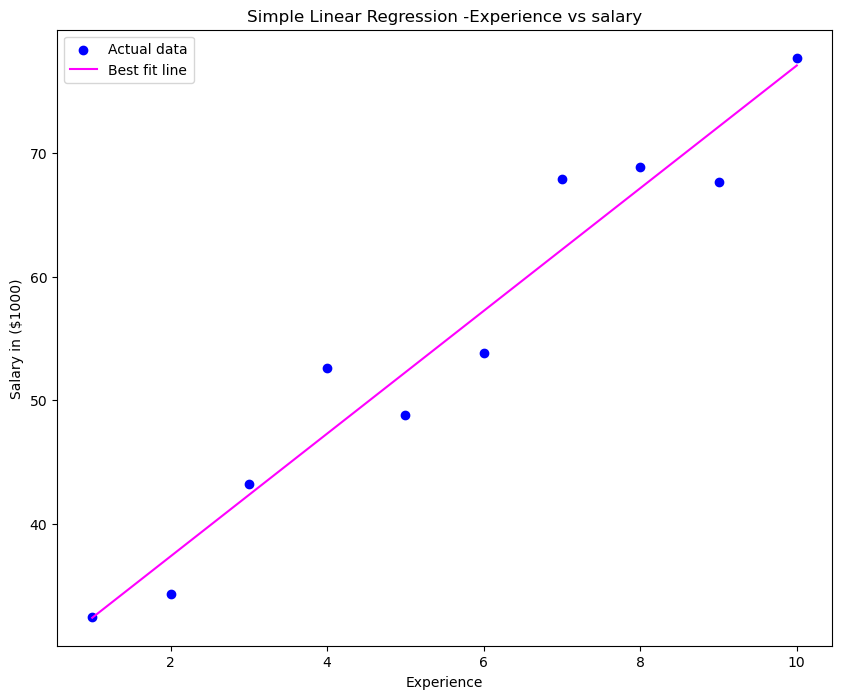

In [67]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,color='blue' , label='Actual data')

plt.plot(x,y_pred, color='magenta',label='Best fit line')

plt.legend()
plt.xlabel("Experience")
plt.ylabel("Salary in ($1000)")
plt.title("Simple Linear Regression -Experience vs salary")
plt.show()

In [68]:
#User can input experience, and the model will predict salary
while True:
    try:
        exp=float(input("\nEnter years of experience to predict salary (or -1 to exit):"))
        if exp==-1:
            break
        predicted_salary=model.predict(np.array([[exp]]))[0]
        print(f'Predicted Salary for {exp} years of experience: ${predicted_salary:.2f}k')
    except ValueError:
        print('Please enter a valid number!')


Enter years of experience to predict salary (or -1 to exit):10
Predicted Salary for 10.0 years of experience: $77.09k

Enter years of experience to predict salary (or -1 to exit):-1


In [80]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm  # For OLS Regression
 
# Convert data into Polynomial Features (degree 2 for quadratic relationship)

degree = 2  # You can change this for higher degrees

poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer

x_poly = poly.fit_transform(x)  # Transforming X to polynomial features
 
#Convert data into Polynomial Features (degree 2 for quadratic relationship)

degree = 2  # You can change this for higher degrees

poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer

x_poly = poly.fit_transform(x)  # Transforming X to polynomial features
 
  # For polynomial transformation
 
#. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression

x_ols = sm.add_constant(x_poly)  # Add intercept term for OLS regression

ols_model = sm.OLS(y, x_ols).fit()  # Fit OLS model

print("\nOLS Regression Summary:\n")

print(ols_model.summary())  # Display detailed statistical summary
 


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:13:26   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
